In [1]:
!pip install gym numpy

In [190]:
import numpy as np
import random
import matplotlib.pyplot as plt

"""
Класс ChessEnv создает упрощенную текстовую симуляцию, напоминающую шахматы. В этой симуляции:
Игровая "доска" представлена рядом из четырех клеток.
Агент (A) начинает с первой клетки и должен достичь последней клетки (G), которая является целью.
На одной из промежуточных клеток располагается противник (E).
"""
class ChessEnv:
  def __init__(self):
    self.board_size = [2, 5]
    self.goal_pos = [0, 4]
    self.enemy_pos = [[1, 1], [0, 3]]
    self.state_space_size = self.board_size[0] * self.board_size[1]
    self.action_space_size = 4  # Размер пространства действий: вперед и назад
    self.reset()

  def reset(self):
    self.agent_pos = [1, 0]
    return self.agent_pos

  def pos2int(self, pos): return (pos[0] * self.board_size[1]) + pos[1]
  def int2pos(self, intpos): return [int(intpos / self.board_size[1]), intpos % self.board_size[1]]

  def step(self, action):
    if action == "forward":
      self.agent_pos[1] = min(self.agent_pos[1] + 1, self.board_size[1] - 1)
    elif action == "backward":
      self.agent_pos[1] = max(self.agent_pos[1] - 1, 0)
    elif action == "up":
      self.agent_pos[0] = min(self.agent_pos[0] + 1, self.board_size[0] - 1)
    elif action == "down":
      self.agent_pos[0] = max(self.agent_pos[0] - 1, 0)

    reward = 0
    done = False

    if self.agent_pos == self.goal_pos:
      reward = 1  # Награда за достижение цели
      done = True
      print("Агент достиг цели!")
    elif self.agent_pos in self.enemy_pos:
      reward = -1  # Штраф за столкновение с противником
      print("Агент столкнулся с противником!")

    return self.agent_pos, reward, done

  def step_silent(self, action):
    if action == 0:
      self.agent_pos[1] = min(self.agent_pos[1] + 1, self.board_size[1] - 1)
    elif action == 1:
      self.agent_pos[1] = max(self.agent_pos[1] - 1, 0)
    elif action == 2:
      self.agent_pos[0] = min(self.agent_pos[0] + 1, self.board_size[0] - 1)
    elif action == 3:
      self.agent_pos[0] = max(self.agent_pos[0] - 1, 0)

    reward = 0
    done = False

    if self.agent_pos == self.goal_pos:
      reward = 1  # Награда за достижение цели
      done = True
    elif self.agent_pos in self.enemy_pos:
      reward = -1  # Штраф за столкновение с противником

    return self.pos2int(self.agent_pos), reward, done

  def step_silent2(self, state, action):
    next_state = self.int2pos(state)
    if action == 0:
      next_state[1] = min(next_state[1] + 1, self.board_size[1] - 1)
    elif action == 1:
      next_state[1] = max(next_state[1] - 1, 0)
    elif action == 2:
      next_state[0] = min(next_state[0] + 1, self.board_size[0] - 1)
    elif action == 3:
      next_state[0] = max(next_state[0] - 1, 0)

    reward = 0
    done = False

    if next_state == self.goal_pos:
      reward = 1  # Награда за достижение цели
      done = True
    elif next_state in self.enemy_pos:
      reward = -1  # Штраф за столкновение с противником

    return self.pos2int(next_state), reward, done

  def getdetails(self, pos):
    color = 'cyan'
    text = ''
    if pos == self.agent_pos:
      color = 'black'
      text = 'A'
    elif pos in self.enemy_pos:
      color = 'red'
      text = 'E'
    elif pos == self.goal_pos:
      color = 'green'
      text = 'G'
    return color, text

  def render(self):
    figsize = (5,2)
    rectsize = (1 / figsize[0], 1 / figsize[1])
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.axis('off')
    for r in range(self.board_size[0]):
      for c in range(self.board_size[1]):
        color, text = self.getdetails([r, c])
        ax.add_artist(plt.Rectangle((rectsize[0] * c, rectsize[1] * r), rectsize[0], rectsize[1], color=color))
        if len(text) > 0:
          ax.add_artist(plt.Text((rectsize[0] * c) + (rectsize[0] / 2), (rectsize[1] * r) + (rectsize[1] / 2.75), text, size=20, ha='center', color='yellow'))
    plt.show()



---------------------------


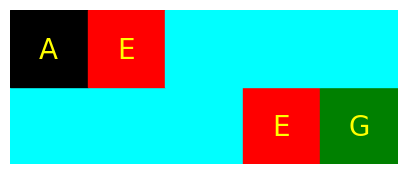

Начальная позицию [1, 0]

---------------------------


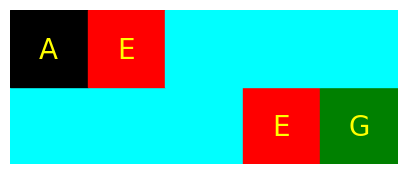

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


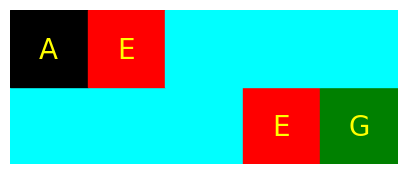

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


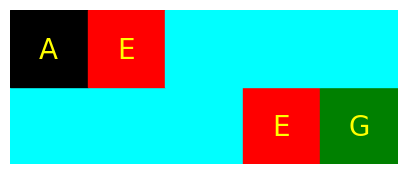

forward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


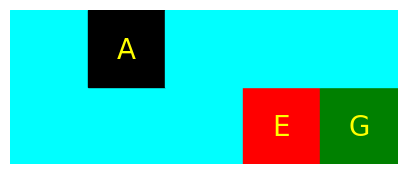

forward
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


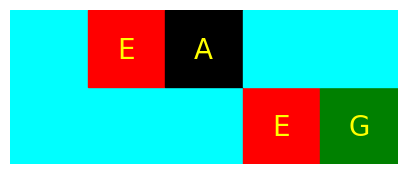

up
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


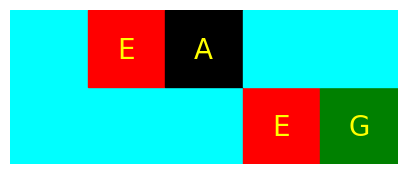

down
Агент перешел в позицию [0, 2], Награда: 0

---------------------------


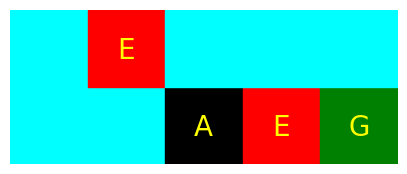

up
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


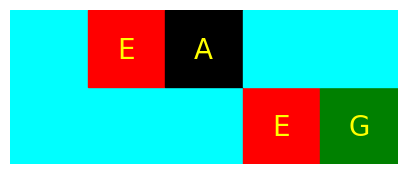

backward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


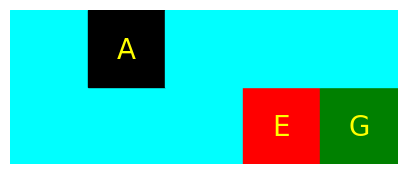

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


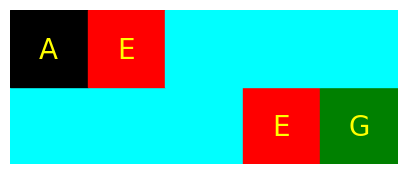

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


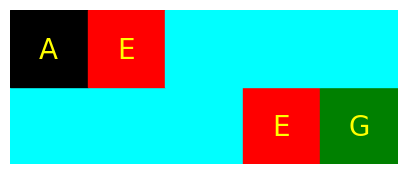

down
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


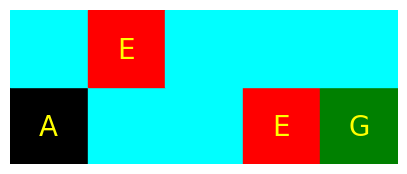

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


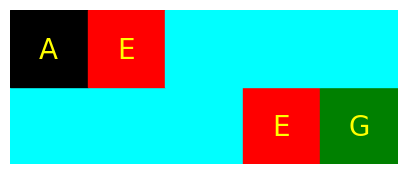

forward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


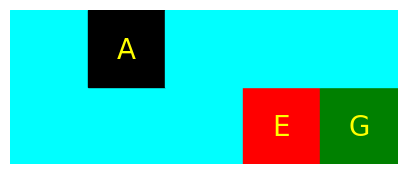

down
Агент перешел в позицию [0, 1], Награда: 0

---------------------------


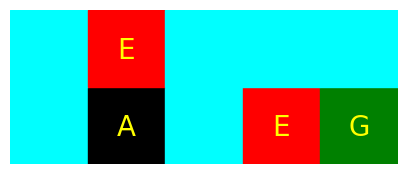

backward
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


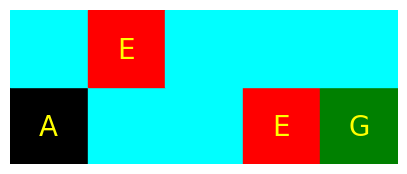

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


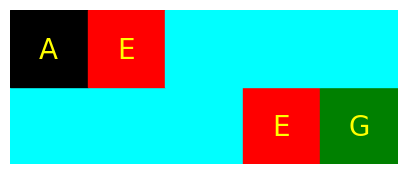

forward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


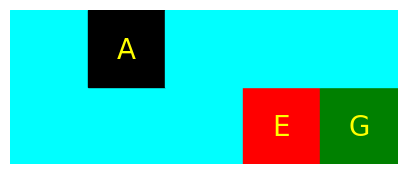

forward
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


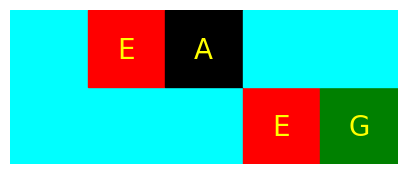

backward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


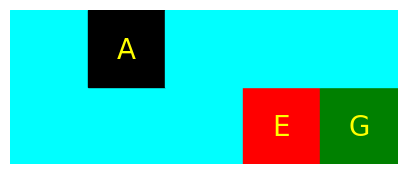

up
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


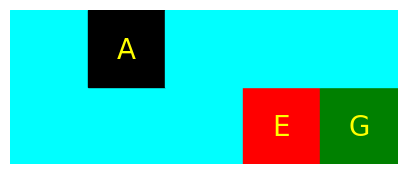

forward
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


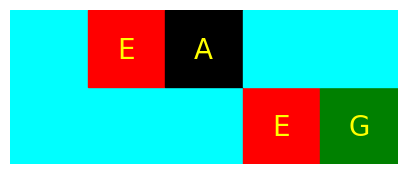

backward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


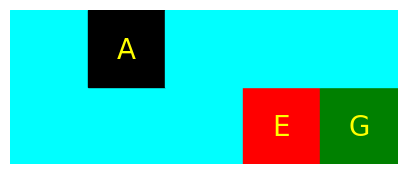

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


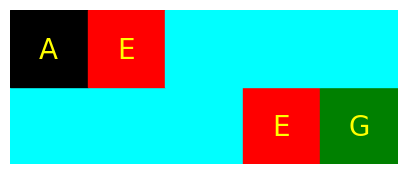

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


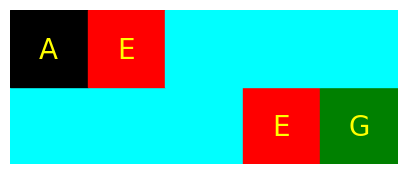

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


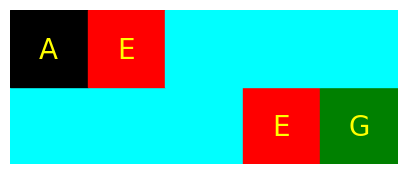

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


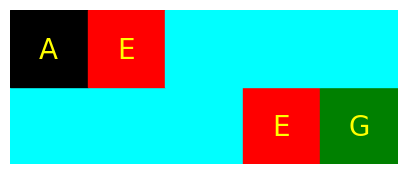

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


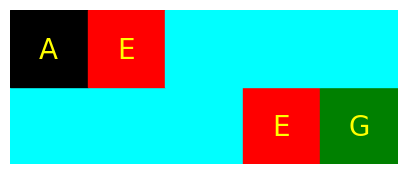

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


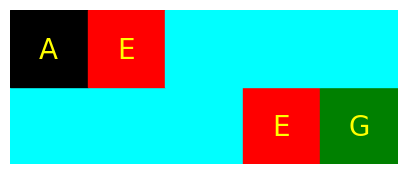

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


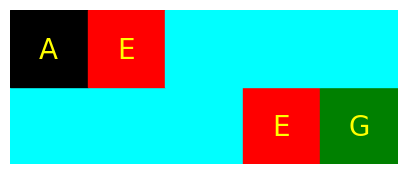

forward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


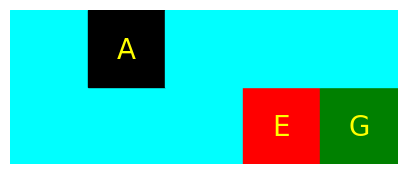

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


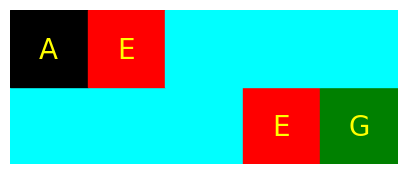

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


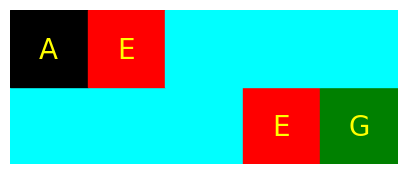

down
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


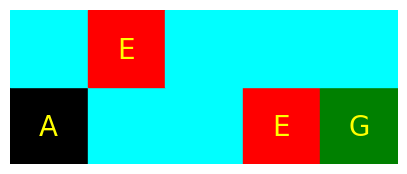

down
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


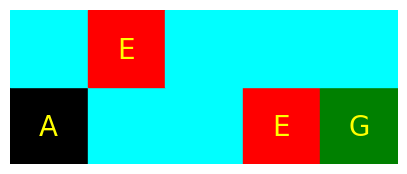

backward
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


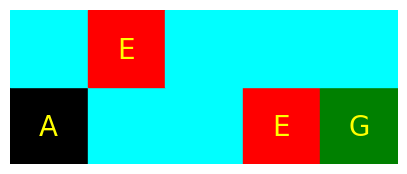

down
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


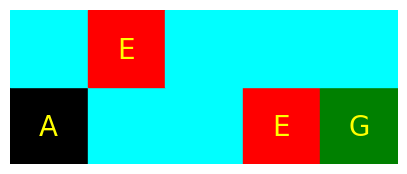

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


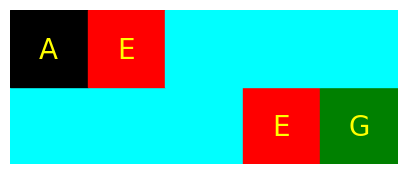

forward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


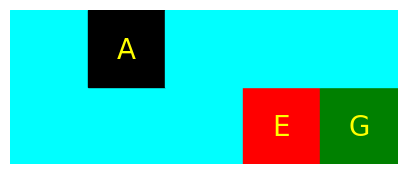

forward
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


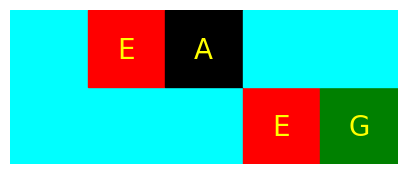

down
Агент перешел в позицию [0, 2], Награда: 0

---------------------------


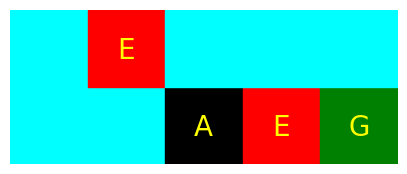

up
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


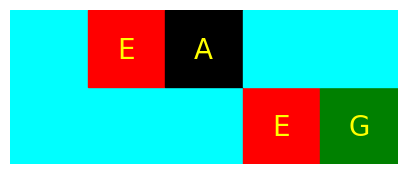

backward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


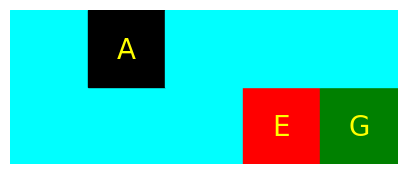

forward
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


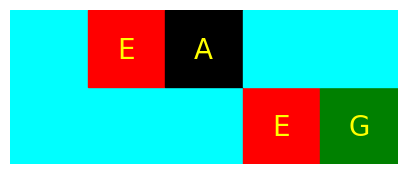

up
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


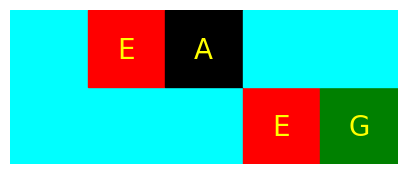

up
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


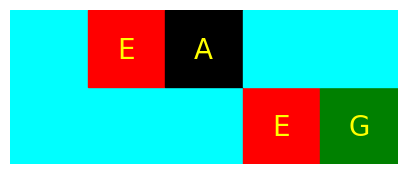

down
Агент перешел в позицию [0, 2], Награда: 0

---------------------------


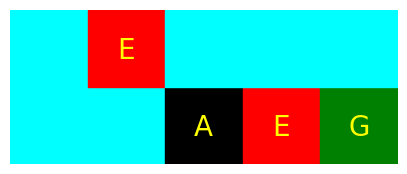

up
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


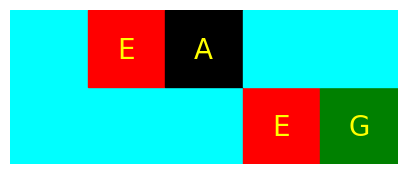

down
Агент перешел в позицию [0, 2], Награда: 0

---------------------------


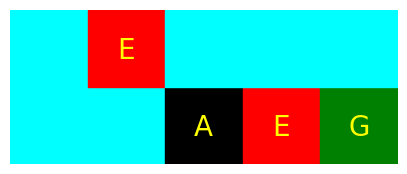

backward
Агент перешел в позицию [0, 1], Награда: 0

---------------------------


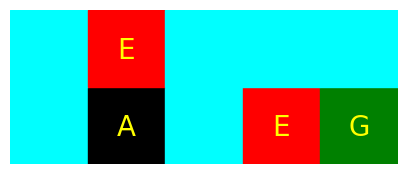

backward
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


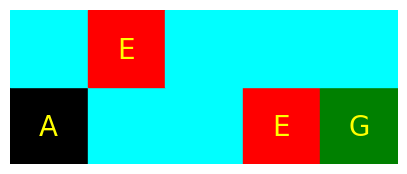

forward
Агент перешел в позицию [0, 1], Награда: 0

---------------------------


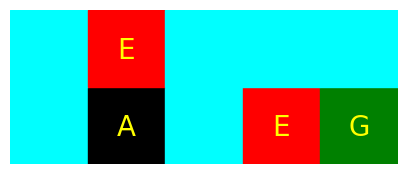

backward
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


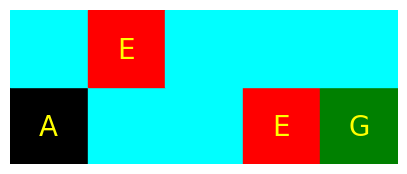

backward
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


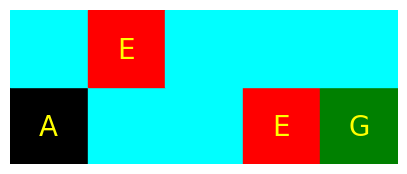

down
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


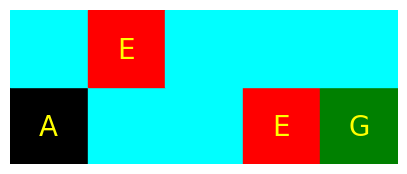

down
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


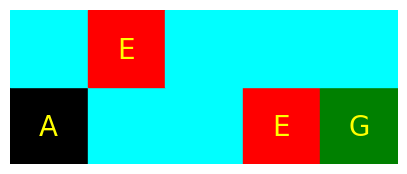

backward
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


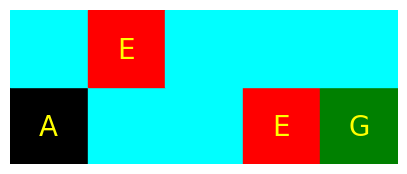

backward
Агент перешел в позицию [0, 0], Награда: 0

---------------------------


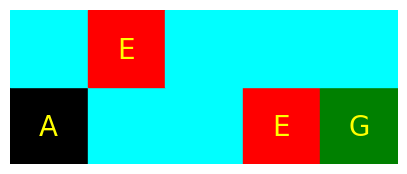

up
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


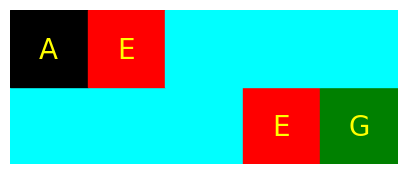

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


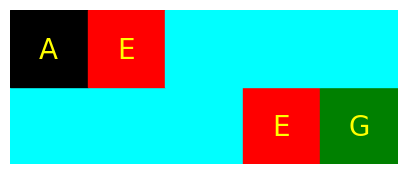

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


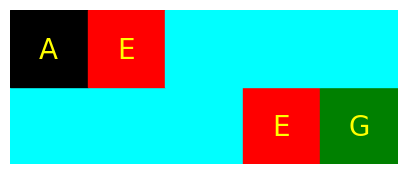

backward
Агент перешел в позицию [1, 0], Награда: 0

---------------------------


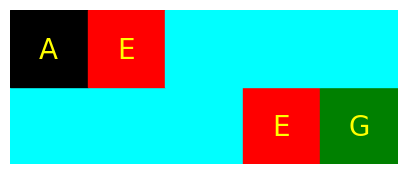

forward
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


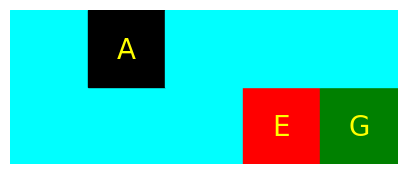

down
Агент перешел в позицию [0, 1], Награда: 0

---------------------------


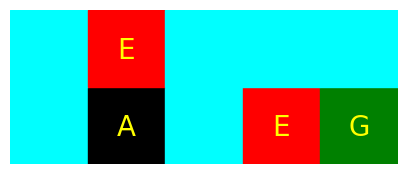

down
Агент перешел в позицию [0, 1], Награда: 0

---------------------------


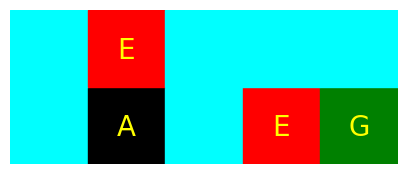

up
Агент столкнулся с противником!
Агент перешел в позицию [1, 1], Награда: -1

---------------------------


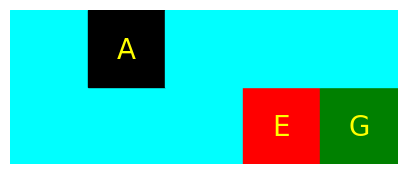

forward
Агент перешел в позицию [1, 2], Награда: 0

---------------------------


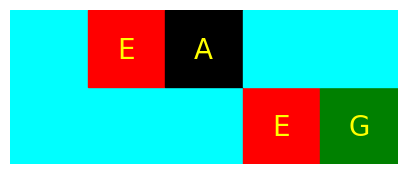

forward
Агент перешел в позицию [1, 3], Награда: 0

---------------------------


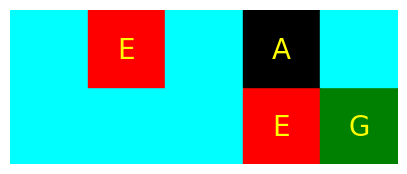

up
Агент перешел в позицию [1, 3], Награда: 0

---------------------------


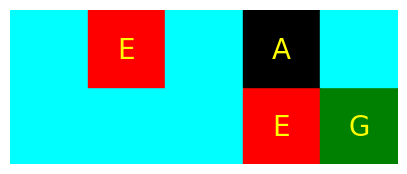

forward
Агент перешел в позицию [1, 4], Награда: 0

---------------------------


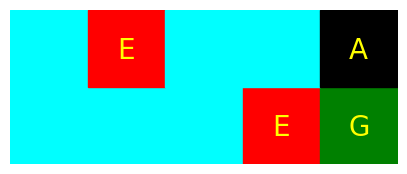

backward
Агент перешел в позицию [1, 3], Награда: 0

---------------------------


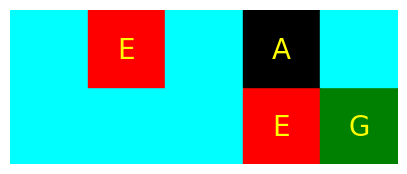

down
Агент столкнулся с противником!
Агент перешел в позицию [0, 3], Награда: -1

---------------------------


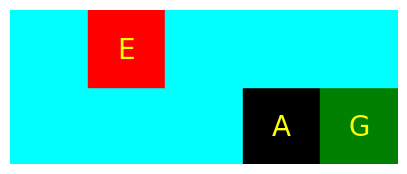

down
Агент столкнулся с противником!
Агент перешел в позицию [0, 3], Награда: -1

---------------------------


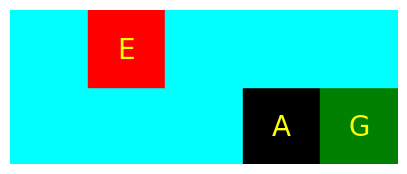

forward
Агент достиг цели!
Агент перешел в позицию [0, 4], Награда: 1

-----------------------------


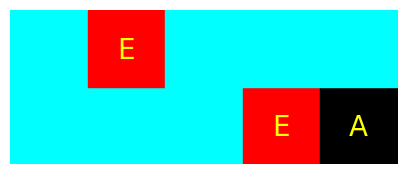

In [157]:
# Симуляция игры
def play_game(policy):
  env = ChessEnv()
  env.reset()
  done = False

  print("\n---------------------------")
  env.render()  # Визуализация состояния перед каждым ходом
  print(f"Начальная позицию {env.agent_pos}")

  while not done:
    print("\n---------------------------")
    env.render()  # Визуализация состояния перед каждым ходом
    action = policy[random.randrange(len(policy))]
    print(action)
    state, reward, done = env.step(action)
    print(f"Агент перешел в позицию {state}, Награда: {reward}")
  print("\n-----------------------------")  # Добавлен разделитель
  env.render()  # Визуализация конечного состояния

# Пример политики: всегда двигаться вперед
policy = {0: "forward", 1: "backward", 2: "up", 3: "down"}

# Играем в игру
play_game(policy)


In [161]:
"""
Мы определяем класс SimpleEnv, который представляет собой упрощенную игровую среду.
Среда состоит из "доски" с определенным размером, позициями агента, цели и противника.
В методе step класса SimpleEnv определяется, как изменяется состояние среды и какие награды получает агент в зависимости от его действий.
Метод reset используется для сброса среды в начальное состояние.
Функция q_learning реализует алгоритм Q-обучения.
Она создает и обновляет Q-таблицу на основе взаимодействия агента со средой, его действий и полученных наград.
После выполнения обучения выводится обученная Q-таблица, показывающая оценки качества каждого действия в каждом состоянии.
"""

import numpy as np
import random

# Функция Q-обучения
def q_learning(env, total_episodes=1000, learning_rate=0.8, max_steps=100, gamma=0.95):
  # Инициализация Q-таблицы нулями
  q_table = np.zeros((env.state_space_size, env.action_space_size))

  # Цикл по эпизодам обучения
  for episode in range(total_episodes):
    state = env.pos2int(env.reset())  # Сброс среды к начальному состоянию
    done = False

    # Цикл внутри одного эпизода
    for step in range(max_steps):
      # Выбор действия: либо исследование, либо использование Q-таблицы
      exploration_rate = 1.0 - (episode / total_episodes)
      action = np.argmax(q_table[state, :]) if random.uniform(0, 1) > exploration_rate else random.choice([0, 1, 2, 3])

      # Применение действия и получение нового состояния и награды
      new_state, reward, done = env.step_silent(action)

      # Обновление Q-значения с использованием уравнения Беллмана
      q_table[state, action] = q_table[state, action] + learning_rate * (reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])

      # Переход к новому состоянию
      state = new_state

      # Если игра завершилась, выйти из цикла
      if done:
        break

    # Возвращение обученной Q-таблицы
  return q_table

# Создаем среду и обучаем агента
env = ChessEnv()
q_table = q_learning(env)

# Вывод обученной Q-таблицы
print("Обученная Q-таблица:")
print(q_table)

Обученная Q-таблица:
[[ 0.77378094  0.73509189  0.6983373   0.73509189]
 [ 0.81450625  0.73509189 -0.18549375  0.77378094]
 [-0.05        0.77378094  0.857375    0.81450625]
 [ 1.          0.81450625  0.9025     -0.05      ]
 [ 0.          0.          0.          0.        ]
 [-0.18549375  0.6983373   0.6983373   0.73509189]
 [ 0.857375    0.6983373  -0.18549375  0.77378094]
 [ 0.9025     -0.18549375  0.857375    0.81450625]
 [ 0.95        0.857375    0.9025     -0.05      ]
 [ 0.95        0.9025      0.95        1.        ]]


In [147]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 465.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.5 MB/s eta 0:00:00


In [214]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

# Определение нейронной сети для аппроксимации Q-функции
class QNetwork(nn.Module):
  def __init__(self, state_size, action_size):
    super(QNetwork, self).__init__()
    # Простая сеть с одним скрытым слоем
    self.fc1 = nn.Linear(state_size, 24)
    self.fc2 = nn.Linear(24, action_size)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

def train(env, model, episodes=1000, learning_rate=0.001, gamma=0.95):
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  loss_fn = nn.MSELoss()

  for episode in range(episodes):
    state = env.pos2int(env.reset())
    #state = env.reset()
    done = False
    print(f'\rEpisode {episode} from {episodes}', end = '')

    while not done:
      state_tensor = torch.FloatTensor([state])
      q_values = model(state_tensor)

      # Исправление: Изменение выбора действия
      _, action = torch.max(q_values, dim=0)
      action = action.item()

      next_state, reward, done = env.step_silent2(state, action)

      next_state_tensor = torch.FloatTensor([next_state])
      next_q_values = model(next_state_tensor)

      target_q = reward + gamma * torch.max(next_q_values)
      loss = loss_fn(q_values[action], target_q)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      state = next_state

  print(f"Обучение завершено после {episodes} эпизодов")

# Создание сети и обучение
state_size = 1  # Размерность состояния
action_size = 4  # Количество возможных действий

q_network = QNetwork(state_size, action_size)
env = ChessEnv()
train(env, q_network)

Episode 0 from 1000

KeyboardInterrupt: 

In [215]:
# Тестирование модели
"""
В этой функции test_model:

Модель используется для предсказания Q-значений на основе текущего состояния.
Выбирается действие с максимальным Q-значением.
Выполняется шаг в среде, и накапливается награда.

"""
def test_model(env, model, num_episodes=10):
  for episode in range(num_episodes):
    state = env.pos2int(env.reset())
    #state = env.reset()
    done = False
    total_reward = 0

    while not done:
      state_tensor = torch.FloatTensor([state])
      q_values = model(state_tensor)
      _, action = torch.max(q_values, dim=0)
      action = action.item()

      next_state, reward, done = env.step_silent2(state, action)
      total_reward += reward
      state = next_state

      print(f"Эпизод {episode+1}, Состояние: {state}, Действие: {action}, Награда: {reward}")

    print(f"Суммарная награда в эпизоде {episode+1}: {total_reward}\n")

# Тестирование модели
print("Тестирование обученной модели:")
test_model(env, q_network)

Выходные данные были обрезаны до нескольких последних строк (5000).
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние: 0, Действие: 1, Награда: 0
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние: 0, Действие: 1, Награда: 0
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние: 0, Действие: 1, Награда: 0
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние: 0, Действие: 1, Награда: 0
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние: 0, Действие: 1, Награда: 0
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние: 0, Действие: 1, Награда: 0
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние: 0, Действие: 1, Награда: 0
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние: 0, Действие: 1, Награда: 0
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние: 0, Действие: 1, Награда: 0
Эпизод 1, Состояние: 1, Действие: 0, Награда: 0
Эпизод 1, Состояние:

KeyboardInterrupt: 